<a href="https://colab.research.google.com/github/joohoshin/MLDL_Basic/blob/master/12_1_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering

라벨링되지 않은 데이터를 그룹화하는데 사용
여러가지가 알고리즘이 많지만, kmeans가 가장 이해하기 쉬운 알고리즘

sklearn 클러스터링

https://scikit-learn.org/stable/modules/clustering.html#clustering

sklearn kmeans

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

교재 11장(386p) 참고

설명 쉬운 블로그
http://hleecaster.com/ml-kmeans-clustering-concept/

In [ ]:
import pandas as pd
import seaborn as sns

iris = sns.load_dataset('iris')

iris 데이터에 라벨이 없다고 가정해봅시다. 
이런 경우 classification을 할 수 없으므로 꽃을 특성을 기준으로 그룹을 만들어 봅시다

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris_no_label = iris.iloc[:,:-1]

In [ ]:
iris_no_label

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


kmeans 알고리즘으로 clustring 해봅시다

kmeans는 몇개로 군집을 할 지 입력이 필요합니다.

label이 없으므로 y는 입력값에 없습니다

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)

In [ ]:
X= iris_no_label.values

In [ ]:
y_km = km.fit_predict(X)

In [ ]:
y_km

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [ ]:
iris['cluster'] = y_km

In [ ]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,1
148,6.2,3.4,5.4,2.3,virginica,1


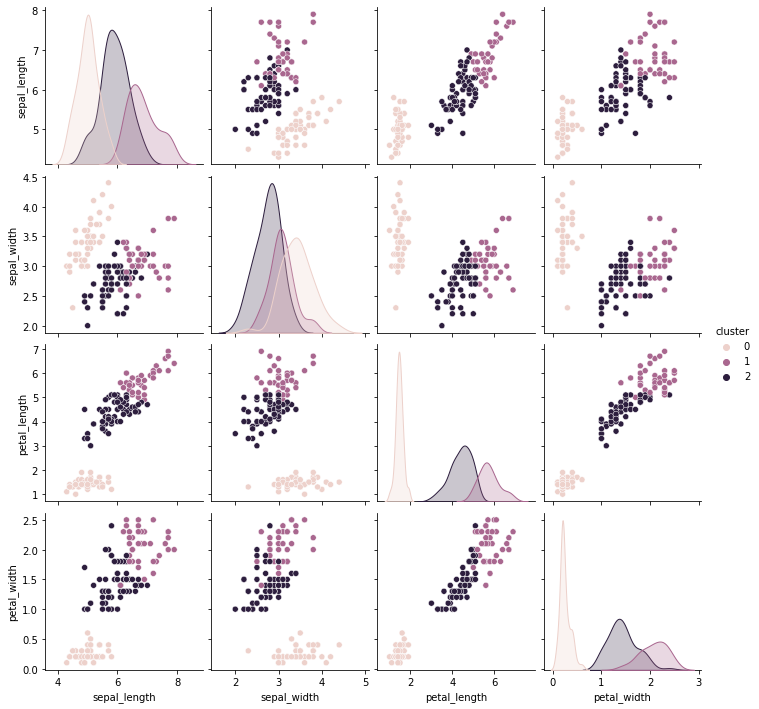

In [ ]:
sns.pairplot(iris, hue='cluster')

In [ ]:
species = pd.pivot_table(iris,values=['sepal_length'], index=['species'],
                    columns=['cluster'], aggfunc='count')

In [ ]:
species

sepal_length            
cluster               0     1     2
species                            
setosa              NaN  50.0   NaN
versicolor         48.0   NaN   2.0
virginica          14.0   NaN  36.0

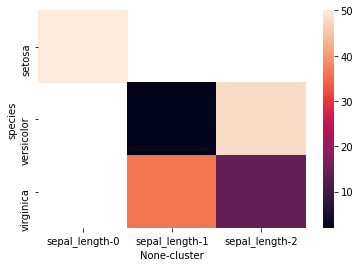

In [ ]:
sns.heatmap(species) #multi column으로 인해 원하는 결과가 나오지 않음

In [ ]:
species.columns.get_level_values(1)

Int64Index([0, 1, 2], dtype='int64', name='cluster')

In [ ]:
species.columns = species.columns.get_level_values(1)

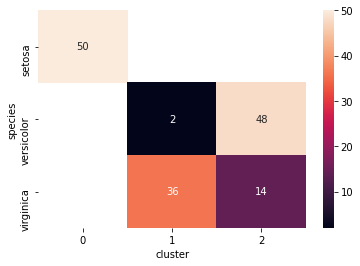

In [ ]:
sns.heatmap(species,annot=True)

In [ ]:
species

cluster,0,1,2
species,,,
setosa,NaN,50.0,NaN
versicolor,48.0,NaN,2.0
virginica,14.0,NaN,36.0


In [ ]:
cluster_summary = pd.pivot_table(iris,values=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], index=['cluster'],
                    aggfunc='mean')

In [ ]:
cluster_summary

,petal_length,petal_width,sepal_length,sepal_width
cluster,,,,
0,4.393548,1.433871,5.901613,2.748387
1,1.462000,0.246000,5.006000,3.428000
2,5.742105,2.071053,6.850000,3.073684


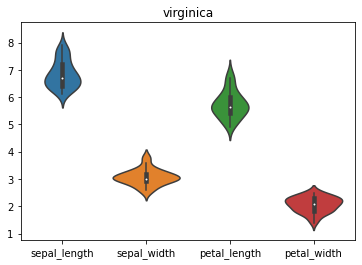

In [ ]:
import matplotlib.pyplot as plt
sns.violinplot(data=iris.loc[iris.cluster==1, ['sepal_length','sepal_width','petal_length','petal_width']])
plt.title('virginica')
plt.show()

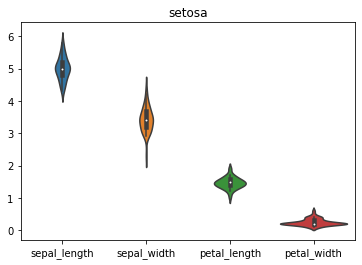

In [ ]:
sns.violinplot(data=iris.loc[iris.cluster==0, ['sepal_length','sepal_width','petal_length','petal_width']])
plt.title('setosa')
plt.show()

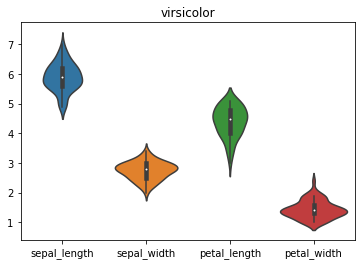

In [ ]:
sns.violinplot(data=iris.loc[iris.cluster==2, ['sepal_length','sepal_width','petal_length','petal_width']])
plt.title('virsicolor')
plt.show()

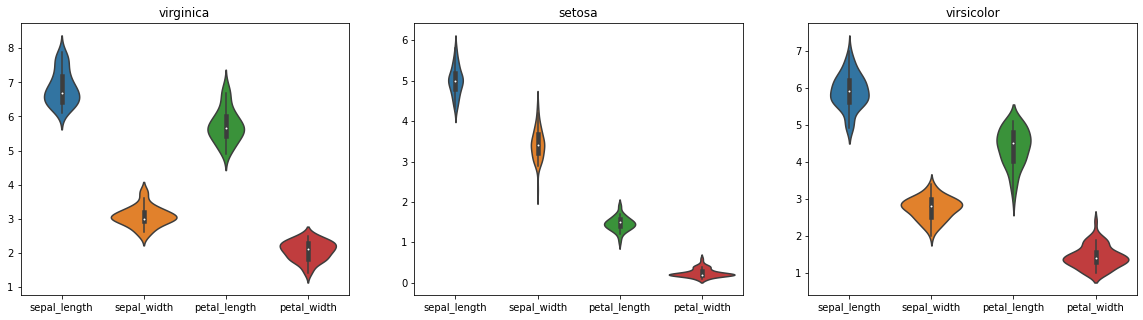

In [ ]:
fig = plt.figure(figsize = (20,5))

plt.subplot(1, 3, 1)
sns.violinplot(data=iris.loc[iris.cluster==1, ['sepal_length','sepal_width','petal_length','petal_width']])
plt.title('virginica')

plt.subplot(1, 3, 2)
sns.violinplot(data=iris.loc[iris.cluster==0, ['sepal_length','sepal_width','petal_length','petal_width']])
plt.title('setosa')

plt.subplot(1, 3, 3)
sns.violinplot(data=iris.loc[iris.cluster==2, ['sepal_length','sepal_width','petal_length','petal_width']])
plt.title('virsicolor')

plt.show()

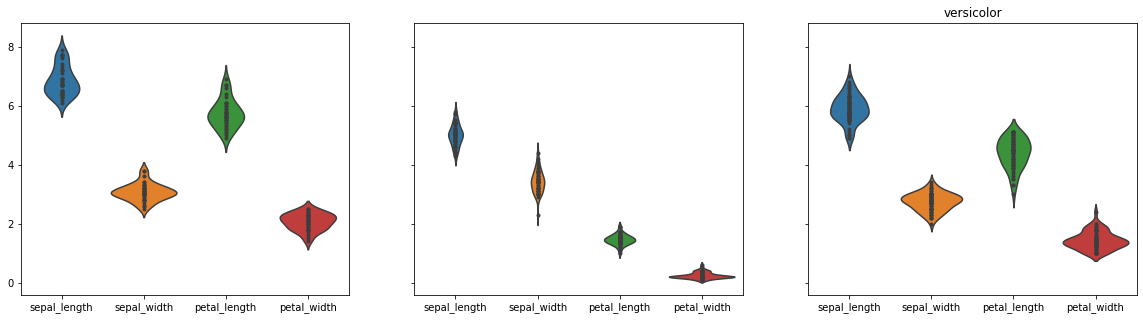

In [ ]:
fig, axs = plt.subplots(1,3, figsize = (20,5), sharey=True)

sns.violinplot(data=iris.loc[iris.cluster==1, ['sepal_length','sepal_width','petal_length','petal_width']], ax=axs[0], inner="points")
plt.title('virginica')

sns.violinplot(data=iris.loc[iris.cluster==0, ['sepal_length','sepal_width','petal_length','petal_width']], ax=axs[1], inner="points")
plt.title('setosa')

sns.violinplot(data=iris.loc[iris.cluster==2, ['sepal_length','sepal_width','petal_length','petal_width']], ax=axs[2], inner="points")
plt.title('versicolor')

plt.show()